In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

In [40]:
transactionData= pd.read_csv('QVI_data.csv')

transactionData.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE_x,PREMIUM_CUSTOMER_x,LIFESTAGE_y,PREMIUM_CUSTOMER_y
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES,Mainstream


In [41]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LYLTY_CARD_NBR      264834 non-null  int64  
 1   DATE                264834 non-null  object 
 2   STORE_NBR           264834 non-null  int64  
 3   TXN_ID              264834 non-null  int64  
 4   PROD_NBR            264834 non-null  int64  
 5   PROD_NAME           264834 non-null  object 
 6   PROD_QTY            264834 non-null  int64  
 7   TOT_SALES           264834 non-null  float64
 8   PACK_SIZE           264834 non-null  int64  
 9   BRAND               264834 non-null  object 
 10  LIFESTAGE_x         264834 non-null  object 
 11  PREMIUM_CUSTOMER_x  264834 non-null  object 
 12  LIFESTAGE_y         264834 non-null  object 
 13  PREMIUM_CUSTOMER_y  264834 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 28.3+ MB


In [42]:
transactionData.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,264834.0,135548.793331,80579.898912,1000.0,70021.0,130357.0,203094.00,2373711.0
STORE_NBR,264834.0,135.079423,76.784063,1.0,70.0,130.0,203.00,272.0
TXN_ID,264834.0,135157.623236,78132.920436,1.0,67600.5,135136.5,202699.75,2415841.0
PROD_NBR,264834.0,56.583554,32.826444,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264834.0,1.905813,0.343436,1.0,2.0,2.0,2.00,5.0
TOT_SALES,264834.0,7.299346,2.527241,1.5,5.4,7.4,9.20,29.5
PACK_SIZE,264834.0,182.425512,64.325148,70.0,150.0,170.0,175.00,380.0


In [43]:
#CONVERTING DATE COLUMN TO DATE FORMAT

transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], format = '%Y-%m-%d')

In [44]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LYLTY_CARD_NBR      264834 non-null  int64         
 1   DATE                264834 non-null  datetime64[ns]
 2   STORE_NBR           264834 non-null  int64         
 3   TXN_ID              264834 non-null  int64         
 4   PROD_NBR            264834 non-null  int64         
 5   PROD_NAME           264834 non-null  object        
 6   PROD_QTY            264834 non-null  int64         
 7   TOT_SALES           264834 non-null  float64       
 8   PACK_SIZE           264834 non-null  int64         
 9   BRAND               264834 non-null  object        
 10  LIFESTAGE_x         264834 non-null  object        
 11  PREMIUM_CUSTOMER_x  264834 non-null  object        
 12  LIFESTAGE_y         264834 non-null  object        
 13  PREMIUM_CUSTOMER_y  264834 no

In [45]:
# Examine PROD_NAME

transactionData['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1            Red Rock Deli Chikn&Garlic Aioli 150g
2            Grain Waves Sour    Cream&Chives 210G
3           Natural ChipCo      Hony Soy Chckn175g
4                   WW Original Stacked Chips 160g
                            ...                   
264829       Grain Waves         Sweet Chilli 210g
264830        Kettle Tortilla ChpsFeta&Garlic 150g
264831     Tyrrells Crisps     Lightly Salted 165g
264832    Old El Paso Salsa   Dip Chnky Tom Ht300g
264833    Smiths Crinkle Chips Salt & Vinegar 330g
Name: PROD_NAME, Length: 264834, dtype: object

In [46]:
# Examine the words in PROD_NAME
product_words = pd.Series(transactionData['PROD_NAME'].str.split().explode().unique())

# Rename the column to 'words'
product_words = product_words.rename('words')

In [47]:
# Removing digits
product_words = product_words[product_words.str.contains(r'\d')]

# Removing special characters
product_words = product_words[product_words.str.isalpha()]

# Counting the number of times a word appears
word_counts = product_words.value_counts().reset_index()

# Sorting by frequency in descending order
word_counts = word_counts.sort_values(by=['index'], ascending=False)

# Rename columns to match the R code
word_counts.columns = ['words', 'N']

# Display the result
print(word_counts)


Empty DataFrame
Columns: [words, N]
Index: []


In [48]:
transactionData.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [49]:
transactionData.isnull().sum()

LYLTY_CARD_NBR        0
DATE                  0
STORE_NBR             0
TXN_ID                0
PROD_NBR              0
PROD_NAME             0
PROD_QTY              0
TOT_SALES             0
PACK_SIZE             0
BRAND                 0
LIFESTAGE_x           0
PREMIUM_CUSTOMER_x    0
LIFESTAGE_y           0
PREMIUM_CUSTOMER_y    0
dtype: int64

In [50]:
# Filter the dataset to find the outlier
outlier_transactions = transactionData[transactionData['PROD_QTY'] == 200]

# Display the result
print(outlier_transactions)

Empty DataFrame
Columns: [LYLTY_CARD_NBR, DATE, STORE_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE_x, PREMIUM_CUSTOMER_x, LIFESTAGE_y, PREMIUM_CUSTOMER_y]
Index: []


In [51]:
transactionData.duplicated().sum()

1

In [52]:
# Filter transactions for the specified LYLTY_CARD_NBR
customer_transactions = transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]

# Display the result
print(customer_transactions)

Empty DataFrame
Columns: [LYLTY_CARD_NBR, DATE, STORE_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE_x, PREMIUM_CUSTOMER_x, LIFESTAGE_y, PREMIUM_CUSTOMER_y]
Index: []


In [53]:
# Count the number of transactions by date
transactions_by_date = transactionData.groupby('DATE').size().reset_index(name='N')

# Display the result
print(transactions_by_date)

          DATE    N
0   2018-07-01  724
1   2018-07-02  711
2   2018-07-03  722
3   2018-07-04  714
4   2018-07-05  712
..         ...  ...
359 2019-06-26  723
360 2019-06-27  709
361 2019-06-28  730
362 2019-06-29  745
363 2019-06-30  744

[364 rows x 2 columns]


There’s only 364 rows, meaning only 364 dates which indicates a missing date. Let’s create a sequence of
dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to
find the missing date.


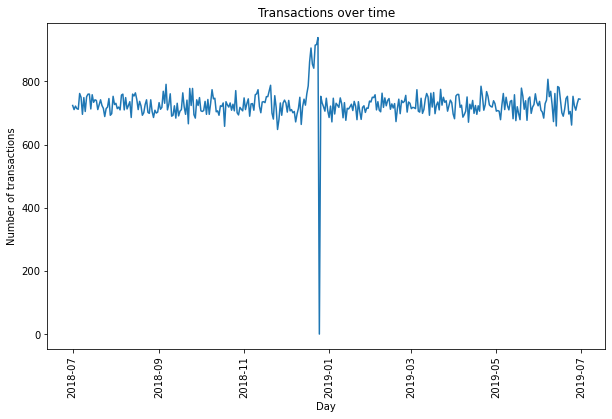

In [54]:
# Create a sequence of dates
all_dates = pd.date_range(start="2018-07-01", end="2019-06-30", freq='D')
all_dates_df = pd.DataFrame({'DATE': all_dates})

# Merge with the count of transactions by date
transactions_by_day = pd.merge(all_dates_df, transactionData.groupby('DATE').size().reset_index(name='N'), how='left', on='DATE')

# Fill NaN values with 0
transactions_by_day['N'] = transactions_by_day['N'].fillna(0)

# Plot transactions over time
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_day['DATE'], transactions_by_day['N'])
plt.title('Transactions over time')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)
plt.show()

We can see that there is an increase in purchases in December and a total decrease in late December. Let’s zoom in
on this.

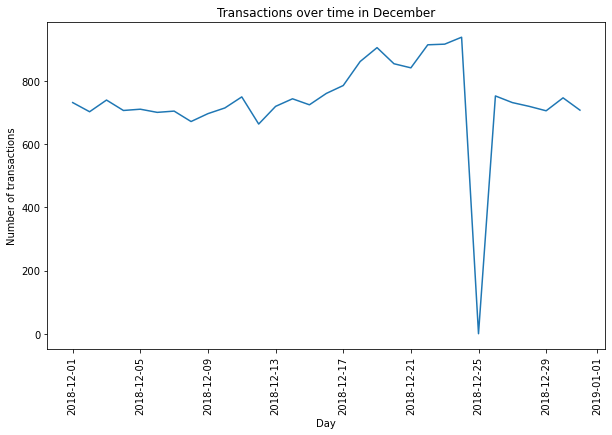

In [55]:
# Filter to December
december_data = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# Plot transactions over time for December
plt.figure(figsize=(10, 6))
plt.plot(december_data['DATE'], december_data['N'])
plt.title('Transactions over time in December')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.
we can move on to creating other features
such as brand of chips or pack size from PROD_NAME.


In [56]:
# Extract numeric values from PROD_NAME and create a new column PACK_SIZE
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract('(\d+)')

# Convert the PACK_SIZE column to numeric type
transactionData['PACK_SIZE'] = pd.to_numeric(transactionData['PACK_SIZE'])

# Group by PACK_SIZE and count the number of occurrences
pack_size_counts = transactionData.groupby('PACK_SIZE').size().reset_index(name='COUNT')

# Display the result
print(pack_size_counts)

    PACK_SIZE  COUNT
0          70   1507
1          90   3008
2         110  22387
3         125   1454
4         134  25102
5         135   3257
6         150  43131
7         160   2970
8         165  15297
9         170  19983
10        175  66390
11        180   1468
12        190   2995
13        200   4473
14        210   6272
15        220   1564
16        250   3169
17        270   6285
18        300  15166
19        330  12540
20        380   6416


The largest size is 380g and the smallest size is 70g - seems sensible!


In [57]:
#Let's check the output of the first few rows to see if we have indeed
#picked out pack size.
transactionData.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE_x,PREMIUM_CUSTOMER_x,LIFESTAGE_y,PREMIUM_CUSTOMER_y
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES,Mainstream


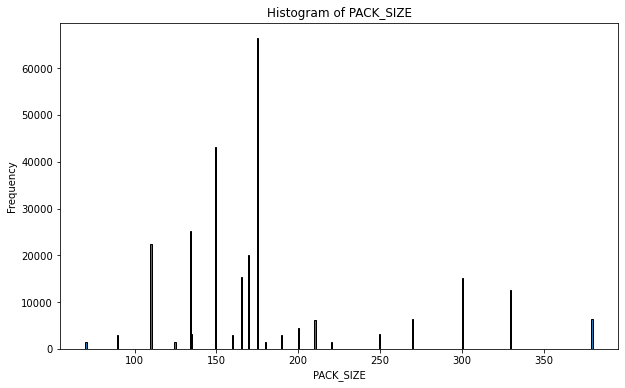

In [58]:
#Let's plot a histogram of PACK_SIZE since we know that it is a categorical
#variable and not a continuous variable even though it is numeric.

# Plot a histogram of PACK_SIZE
plt.figure(figsize=(10, 6))
plt.hist(transactionData['PACK_SIZE'], bins='auto', edgecolor='black')
plt.xlabel('PACK_SIZE')
plt.ylabel('Frequency')
plt.title('Histogram of PACK_SIZE')
plt.show()

In [59]:
# Extracting brands from PROD_NAME
transactionData['BRAND'] = transactionData['PROD_NAME'].str.split(' ', 1).str[0].str.upper()

# Checking brands
brand_counts = transactionData['BRAND'].value_counts().reset_index().rename(columns={'index': 'BRAND', 'BRAND': 'Count'})
brand_counts = brand_counts.sort_values(by='Count', ascending=False)
print(brand_counts)

         BRAND  Count
0       KETTLE  41288
1       SMITHS  28860
2     PRINGLES  25102
3      DORITOS  24962
4        THINS  14075
5          RRD  11894
6    INFUZIONS  11057
7           WW  10320
8         COBS   9693
9     TOSTITOS   9471
10    TWISTIES   9454
11         OLD   9324
12    TYRRELLS   6442
13       GRAIN   6272
14     NATURAL   6050
15         RED   5885
16    CHEEZELS   4603
17         CCS   4551
18  WOOLWORTHS   4437
19      DORITO   3183
20      INFZNS   3144
21       SMITH   2963
22     CHEETOS   2927
23       SNBTS   1576
24      BURGER   1564
25     GRNWVES   1468
26    SUNBITES   1432
27         NCC   1419
28      FRENCH   1418


In [60]:
# Clean brand names
brand_corrections = {
    'RED': 'RRD',
    'SNBTS': 'SUNBITES',
    'INFZNS': 'INFUZIONS',
    'WW': 'WOOLWORTHS',
    'SMITH': 'SMITHS',
    'NCC': 'NATURAL',
    'DORITO': 'DORITOS',
    'GRAIN': 'GRNWVES'
}

for old_brand, new_brand in brand_corrections.items():
    transactionData.loc[transactionData['BRAND'] == old_brand, 'BRAND'] = new_brand

# Check again
brand_counts = transactionData['BRAND'].value_counts().reset_index().rename(columns={'index': 'BRAND', 'BRAND': 'Count'})
brand_counts = brand_counts.sort_values(by='BRAND')
print(brand_counts)


         BRAND  Count
19      BURGER   1564
16         CCS   4551
18     CHEETOS   2927
15    CHEEZELS   4603
8         COBS   9693
2      DORITOS  28145
20      FRENCH   1418
12     GRNWVES   7740
6    INFUZIONS  14201
0       KETTLE  41288
13     NATURAL   7469
11         OLD   9324
3     PRINGLES  25102
4          RRD  17779
1       SMITHS  31823
17    SUNBITES   3008
7        THINS  14075
9     TOSTITOS   9471
10    TWISTIES   9454
14    TYRRELLS   6442
5   WOOLWORTHS  14757


Examining customer data


Let's dive in with the transaction dataset, let’s have a look at the customer dataset.

In [61]:
customerData = pd.read_csv('QVI_purchase_behaviour.csv')

customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [62]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


#Let’s have a closer look at the LIFESTAGE and PREMIUM_CUSTOMER columns.

In [63]:
# Examining the values of lifestage

lifestage_counts = customerData['LIFESTAGE'].value_counts().reset_index().rename(columns={'index': 'LIFESTAGE', 'LIFESTAGE': 'Count'})
lifestage_counts = lifestage_counts.sort_values(by='Count', ascending=False)
print(lifestage_counts)

                LIFESTAGE  Count
0                RETIREES  14805
1   OLDER SINGLES/COUPLES  14609
2   YOUNG SINGLES/COUPLES  14441
3          OLDER FAMILIES   9780
4          YOUNG FAMILIES   9178
5  MIDAGE SINGLES/COUPLES   7275
6            NEW FAMILIES   2549


In [64]:
# Examining the values of premium_customer

premium_counts = customerData['PREMIUM_CUSTOMER'].value_counts().reset_index().rename(columns={'index': 'PREMIUM_CUSTOMER', 'PREMIUM_CUSTOMER' : 'Count'})
premium_counts = premium_counts.sort_values(by='Count', ascending = False)
print(premium_counts)

  PREMIUM_CUSTOMER  Count
0       Mainstream  29245
1           Budget  24470
2          Premium  18922


As there do not seem to be any issues with the customer data, we can now go ahead and join the transaction
and customer data sets together

In [65]:
# Merge transaction data to customer data

data = pd.merge(transactionData, customerData, how = 'left', on = 'LYLTY_CARD_NBR')

data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE_x,PREMIUM_CUSTOMER_x,LIFESTAGE_y,PREMIUM_CUSTOMER_y,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES,Mainstream


In [66]:
#Let’s also check if some customers were not matched on by checking for nulls.

data.isnull().sum()

LYLTY_CARD_NBR        0
DATE                  0
STORE_NBR             0
TXN_ID                0
PROD_NBR              0
PROD_NAME             0
PROD_QTY              0
TOT_SALES             0
PACK_SIZE             0
BRAND                 0
LIFESTAGE_x           0
PREMIUM_CUSTOMER_x    0
LIFESTAGE_y           0
PREMIUM_CUSTOMER_y    0
LIFESTAGE             0
PREMIUM_CUSTOMER      0
dtype: int64

Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:
    
• Who spends the most on chips (total sales), describing customers by lifestage and how premium their
general purchasing behaviour is

• How many customers are in each segment

• How many chips are bought per customer by segment

• What’s the average chip price by customer segment

In [67]:
import plotly.express as px

# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = data.groupby(['LIFESTAGE_x', 'PREMIUM_CUSTOMER_y']).agg(SALES=('TOT_SALES', 'sum')).reset_index()

# Calculate the proportion of sales
sales['PROPORTION'] = sales['SALES'] / sales['SALES'].sum()

# Create a sunburst chart
fig = px.sunburst(sales, path=['LIFESTAGE_x', 'PREMIUM_CUSTOMER_y'], values='PROPORTION',
                  title='Proportion of Sales by Lifestage and Premium Customer',
                  custom_data=['PROPORTION'])

# Add text labels with proportion figures
fig.update_traces(textinfo='label+text', texttemplate='%{label}: %{customdata[0]:.2%}')

# Adjust size and layout
fig.update_layout(width=500, height=500, margin=dict(l=0, r=0, b=0, t=40))

# Show the figure
fig.show()


C:\Users\GREJOY\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\GREJOY\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees

In [68]:
import plotly.express as px

# Create a weighted DataFrame for customers
customers = data.groupby(['LIFESTAGE_x', 'PREMIUM_CUSTOMER_y']).agg(CUSTOMERS=('LYLTY_CARD_NBR', 'sum')).reset_index()

# Calculate the proportion of customers
customers['PROPORTION'] = customers['CUSTOMERS'] / customers['CUSTOMERS'].sum()

# Create a sunburst chart
fig = px.sunburst(customers, path=['PREMIUM_CUSTOMER_y', 'LIFESTAGE_x'], values='PROPORTION',
                  title='Proportion of Customers by Lifestage and Premium Customer',
                  custom_data=['PROPORTION'])

# Add text labels with proportion figures
fig.update_traces(textinfo='label+text', texttemplate='%{label}: %{customdata[0]:.2%}')

# Adjust size and layout
fig.update_layout(width=600, height=600, margin=dict(l=0, r=0, b=0, t=40))

# Show the figure
fig.show()


C:\Users\GREJOY\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\GREJOY\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. 
This contributes to there being more sales to these customer segments but this is not a major driver for the Budget
- Older families segment.

In [69]:
# Calculate the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = data.groupby(['LIFESTAGE_x', 'PREMIUM_CUSTOMER_y']).agg(AVG=('PROD_QTY', 'sum')).reset_index()
avg_units['AVG'] /= data.groupby(['LIFESTAGE_x', 'PREMIUM_CUSTOMER_y'])['LYLTY_CARD_NBR'].nunique().values

# Order the DataFrame by AVG in descending order
avg_units = avg_units.sort_values(by='AVG', ascending=False)

# Create a bar plot
fig = px.bar(avg_units, x='LIFESTAGE_x', y='AVG', color='PREMIUM_CUSTOMER_y',
             title='Average Units per Customer by Lifestage and Premium Customer',
             labels={'AVG': 'Avg units per transaction'},
             category_orders={"LIFESTAGE_x": avg_units['LIFESTAGE_x'].tolist()})

# Adjust size and layout
fig.update_layout(width=800, height=500, margin=dict(l=0, r=0, b=0, t=40))

# Show the figure
fig.show()


Older families and young families in general buy more chips per customer
Let’s also investigate the average price per unit chips bought for each customer segment as this is also a
driver of total sales

In [70]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame
# If not, replace it with your actual DataFrame

# Calculate the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = data.groupby(['LIFESTAGE_x', 'PREMIUM_CUSTOMER_y']).agg(AVG=('TOT_SALES', 'sum'),
                                                                 PROD_QTY=('PROD_QTY', 'sum')).reset_index()
avg_price['AVG'] = avg_price['AVG'] / avg_price['PROD_QTY']

# Order the DataFrame by AVG in descending order
avg_price = avg_price.sort_values(by='AVG', ascending=False)

# Create a bar plot
fig = px.bar(avg_price, x='LIFESTAGE_x', y='AVG', color='PREMIUM_CUSTOMER_y',
             title='Average Price per Unit by Lifestage and Premium Customer',
             labels={'AVG': 'Avg price per unit'},
             category_orders={"LIFESTAGE_x": avg_price['LIFESTAGE_x'].tolist()})

# Adjust size and layout
fig.update_layout(width=800, height=500, margin=dict(l=0, r=0, b=0, t=40))

# Show the figure
fig.show()


Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.


In [71]:
from scipy.stats import ttest_ind

# Filter the data for the two groups
mainstream_group = data[(data['LIFESTAGE_x'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
                        (data['PREMIUM_CUSTOMER_y'] == 'Mainstream')].copy()
non_mainstream_group = data[(data['LIFESTAGE_x'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
                            (data['PREMIUM_CUSTOMER_y'] != 'Mainstream')].copy()

# Calculate the price per unit for each group using .loc
mainstream_group.loc[:, 'price'] = mainstream_group['TOT_SALES'] / mainstream_group['PROD_QTY']
non_mainstream_group.loc[:, 'price'] = non_mainstream_group['TOT_SALES'] / non_mainstream_group['PROD_QTY']

# Perform independent t-test
t_statistic, p_value = ttest_ind(mainstream_group['price'], non_mainstream_group['price'], alternative='greater')

# Print the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')


T-Statistic: 40.83413678791155
P-Value: 0.0


In [72]:
# Deep dive into Mainstream, young singles/couples
segment1 = data[(data['LIFESTAGE_x'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER_y'] == 'Mainstream')]
other = data[~((data['LIFESTAGE_x'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER_y'] == 'Mainstream'))]

# Brand affinity compared to the rest of the population
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_brand = segment1.groupby('BRAND').agg(targetSegment=('PROD_QTY', 'sum')).reset_index()
quantity_other_by_brand = other.groupby('BRAND').agg(other=('PROD_QTY', 'sum')).reset_index()

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

# Sort by affinityToBrand in descending order
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

print(brand_proportions)


         BRAND  targetSegment  other  affinityToBrand
19    TYRRELLS           1143  11155         0.102465
18    TWISTIES           1673  16445         0.101733
9       KETTLE           7172  71879         0.099779
17    TOSTITOS           1645  16489         0.099763
11         OLD           1607  16198         0.099210
12    PRINGLES           4326  43693         0.099009
5      DORITOS           4747  49069         0.096741
4         COBS           1617  16954         0.095376
8    INFUZIONS           2343  24776         0.094567
16       THINS           2187  24742         0.088392
7      GRNWVES           1185  13541         0.087512
3     CHEEZELS            651   8096         0.080410
14      SMITHS           3609  56730         0.063617
6       FRENCH            143   2500         0.057200
2      CHEETOS            291   5239         0.055545
13         RRD           1753  31893         0.054965
10     NATURAL            710  13396         0.053001
1          CCS            40

We can see that :
    
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population

• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population

In [73]:

# Preferred pack size compared to the rest of the population
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE').agg(targetSegment=('PROD_QTY', 'sum')).reset_index()
quantity_other_by_pack = other.groupby('PACK_SIZE').agg(other=('PROD_QTY', 'sum')).reset_index()

pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

# Sort by affinityToPack in descending order
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

print(pack_proportions)


    PACK_SIZE  targetSegment   other  affinityToPack
17        270           1153   10896        0.105819
20        380           1165   11108        0.104879
19        330           2220   21779        0.101933
4         134           4326   43693        0.099009
2         110           3850   38985        0.098756
14        210           1055   10907        0.096727
5         135            535    5677        0.094240
16        250            520    5549        0.093711
9         170           2926   35162        0.083215
18        300           2123   26690        0.079543
10        175           9237  117230        0.078794
6         150           5993   76181        0.078668
8         165           2016   27035        0.074570
12        190            271    5402        0.050167
11        180            130    2634        0.049355
7         160            232    5372        0.043187
1          90            230    5462        0.042109
3         125            109    2621        0.

It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the
rest of the population but let’s dive into what brands sell this pack size.

In [74]:
# Assuming your DataFrame is named 'data'
filtered_data = data[data['PACK_SIZE'] == 270]['PROD_NAME'].unique()
print(filtered_data)


['Twisties Cheese     270g' 'Twisties Chicken270g']


Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

Conclusion

Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task

In [75]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE_x,PREMIUM_CUSTOMER_x,LIFESTAGE_y,PREMIUM_CUSTOMER_y,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES,Mainstream


In [78]:
file_path = "C:/Users/GREJOY/PYTHON PROJECTS IN DATA ANALYSIS/QVI_data.csv"
data.to_csv(file_path, index=False)


# Assuming 'cleaned_data' is your cleaned DataFrame
data.to_csv("C:/Users/GREJOY/PYTHON PROJECTS IN DATA ANALYSIS/QVI_data.csv", index=False)
print(data.to_csv)

<bound method NDFrame.to_csv of         LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0                 1000 2018-10-17          1       1         5   
1                 1002 2018-09-16          1       2        58   
2                 1003 2019-03-07          1       3        52   
3                 1003 2019-03-08          1       4       106   
4                 1004 2018-11-02          1       5        96   
...                ...        ...        ...     ...       ...   
264829         2370701 2018-12-08         88  240378        24   
264830         2370751 2018-10-01         88  240394        60   
264831         2370961 2018-10-24         88  240480        70   
264832         2370961 2018-10-27         88  240481        65   
264833         2373711 2018-12-14         88  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1          Red Rock Deli Chik